In [45]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
import numpy as np

In [35]:
df= pd.read_csv('cleaned_datas.csv')
df
raw_df = pd.read_csv('SBAnational.csv')

/tmp/ipykernel_5970/215476489.py:1: DtypeWarning: Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.
  df= pd.read_csv('cleaned_datas.csv')
/tmp/ipykernel_5970/215476489.py:3: DtypeWarning: Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.
  raw_df = pd.read_csv('SBAnational.csv')


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 899164 entries, 0 to 899163
Data columns (total 12 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   LoanNr_ChkDgt  899164 non-null  int64  
 1   Name           899150 non-null  object 
 2   City           899134 non-null  object 
 3   State          899150 non-null  object 
 4   Zip            899164 non-null  int64  
 5   Bank           897605 non-null  object 
 6   BankState      897598 non-null  object 
 7   NAICS          899164 non-null  int64  
 8   NoEmp          899164 non-null  int64  
 9   NewExist       899028 non-null  float64
 10  FranchiseCode  899164 non-null  int64  
 11  UrbanRural     899164 non-null  int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 82.3+ MB


Why 'NewExist' columns is in float type ? Maybe we will have to change that for further analysis

## Outliers identification

#### IQR

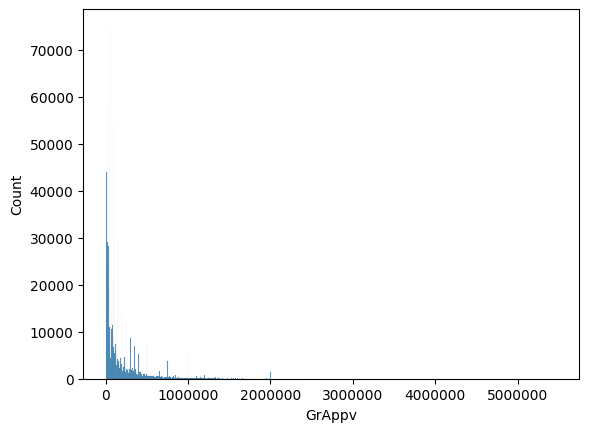

In [49]:
#Is there a meaning to do this part since all our continue variables seems to be more categorical value than continuous one.
fig, ax = plt.subplots()
# ax.plot(x,y)
sns.histplot(df, x="GrAppv", ax=ax)
ax.ticklabel_format(style='plain', axis='x')
plt.show()


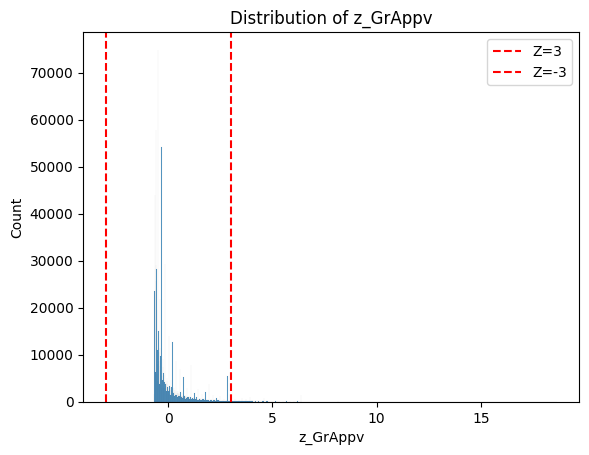

In [50]:
#zscore
zscore=stats.zscore(df['GrAppv'])
df_zscore=pd.DataFrame(zscore, columns=['z_GrAppv'])
sns.histplot(x=df_zscore.z_GrAppv)

plt.axvline(3, color='red', linestyle='--', label='Z=3')
plt.axvline(-3, color='red', linestyle='--', label='Z=-3')
plt.legend()
plt.title('Distribution of z_GrAppv')
plt.show()

## Study of categorical values


In [11]:
#Frequency table
columns_cat = df[['Name', 'City', 'State', 'Zip', 'Bank', 'BankState',
       'NAICS', 'NoEmp', 'NewExist', 'FranchiseCode', 'UrbanRural']]
for i in columns_cat:
    count=df[i].value_counts()
    print("Frequency:")
    print(count)

Frequency:
Name
SUBWAY                            1269
QUIZNO'S SUBS                      433
COLD STONE CREAMERY                366
QUIZNO'S                           345
DOMINO'S PIZZA                     329
                                  ... 
Mohammad N. Hassan (epc) for C       1
N.J. Yellow Tale Flower              1
CEF INC.                             1
SCANNELL AND ASSOCIATES LP           1
DIRECT HIT MARKETING L L C           1
Name: count, Length: 779583, dtype: int64
Frequency:
City
LOS ANGELES    11558
HOUSTON        10247
NEW YORK        7846
CHICAGO         6036
MIAMI           5594
               ...  
Beeville           1
Tuckasegee         1
Branchburgh        1
PARADIS            1
MARIDEN            1
Name: count, Length: 32581, dtype: int64
Frequency:
State
CA    130619
TX     70458
NY     57693
FL     41212
PA     35170
OH     32622
IL     29669
MA     25272
MN     24373
NJ     24035
WA     23263
GA     22277
WI     21040
MO     20678
CO     20605
MI     20545


In [ ]:
#Visualization in apple pie chart
for i in columns_cat:
    df[i].value_counts().plot(kind='pie', autopct='%1.1f%%').set_title(f'{i} distribution')

#A ne pas faire tourner ça fait CRACHER le pc !

Text(0.5, 1.0, 'Name distribution')

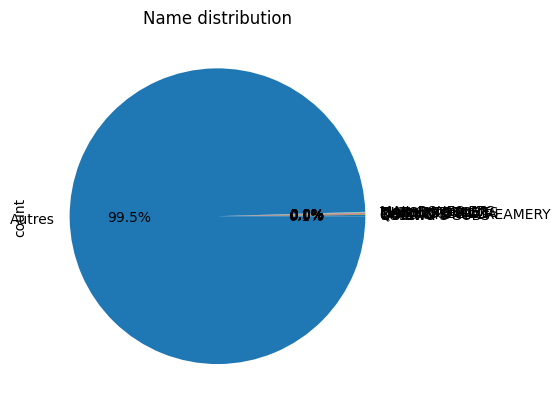

In [5]:

value_counts = df['Name'].value_counts()
top_10 = value_counts.nlargest(10)
other_count = value_counts.iloc[10:].sum()

if other_count > 0:
    top_10["Autres"] = other_count

top_10.plot(kind='pie', autopct='%1.1f%%').set_title(f'Name distribution')


Text(0.5, 1.0, 'Name distribution')

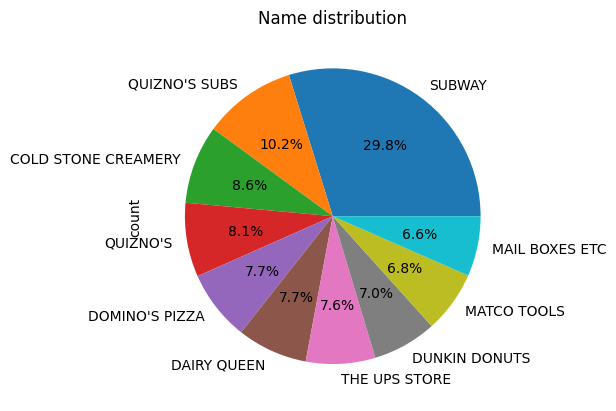

In [7]:

df['Name'].value_counts().nlargest(10).plot(kind='pie', autopct='%1.1f%%').set_title(f'Name distribution')


Text(0.5, 1.0, 'City distribution')

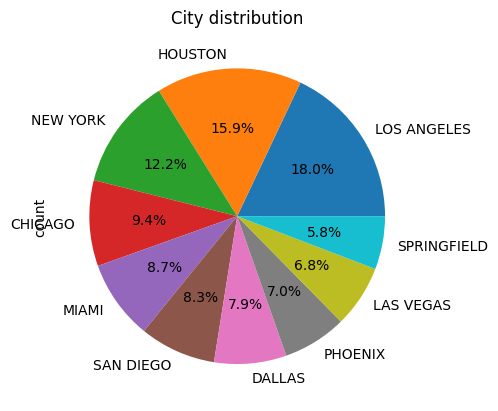

In [9]:
df['City'].value_counts().nlargest(10).plot(kind='pie', autopct='%1.1f%%').set_title(f'City distribution')


Text(0.5, 1.0, 'Zip distribution')

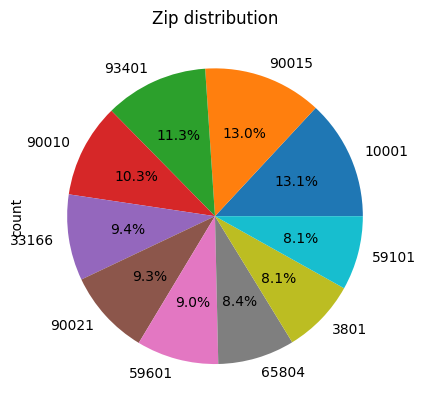

In [10]:

df['Zip'].value_counts().nlargest(10).plot(kind='pie', autopct='%1.1f%%').set_title(f'Zip distribution')


Text(0.5, 1.0, 'Bank distribution')

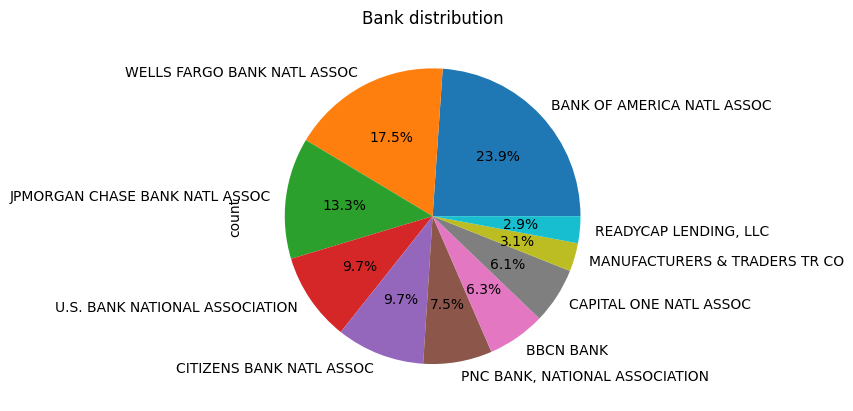

In [11]:

df['Bank'].value_counts().nlargest(10).plot(kind='pie', autopct='%1.1f%%').set_title(f'Bank distribution')


Text(0.5, 1.0, 'State distribution')

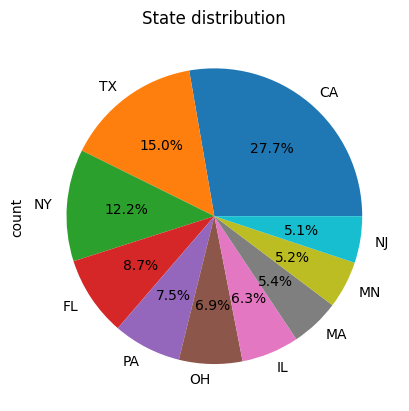

In [12]:

df['State'].value_counts().nlargest(10).plot(kind='pie', autopct='%1.1f%%').set_title(f'State distribution')


Text(0.5, 1.0, 'NewExist distribution')

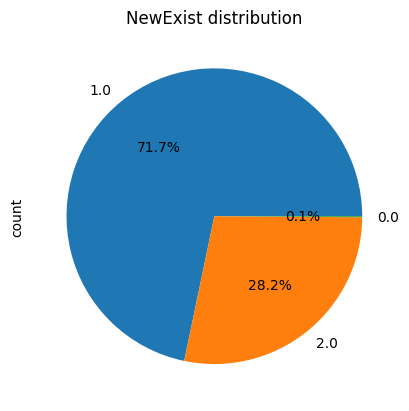

In [14]:

df['NewExist'].value_counts().nlargest(10).plot(kind='pie', autopct='%1.1f%%').set_title(f'NewExist distribution')


Text(0.5, 1.0, 'FranchiseCode distribution')

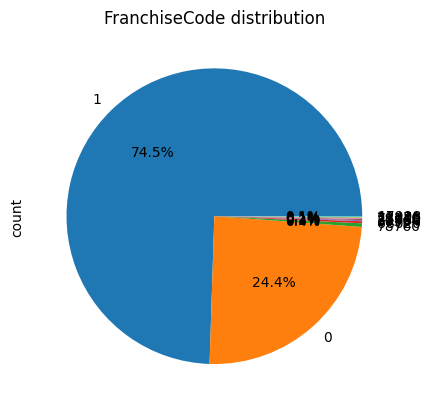

In [15]:

df['FranchiseCode'].value_counts().nlargest(10).plot(kind='pie', autopct='%1.1f%%').set_title(f'FranchiseCode distribution')


Text(0.5, 1.0, 'UrbanRural distribution')

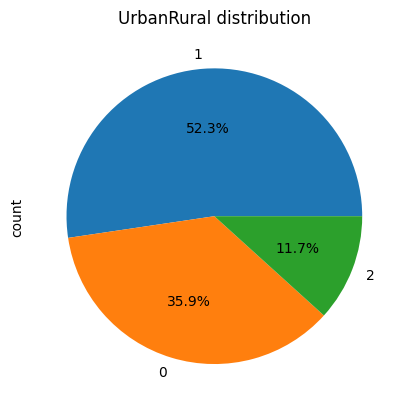

In [16]:

df['UrbanRural'].value_counts().nlargest(10).plot(kind='pie', autopct='%1.1f%%').set_title(f'UrbanRural distribution')


In [20]:
df['City'].value_counts()



City
LOS ANGELES    11558
HOUSTON        10247
NEW YORK        7846
CHICAGO         6036
MIAMI           5594
               ...  
Beeville           1
Tuckasegee         1
Branchburgh        1
PARADIS            1
MARIDEN            1
Name: count, Length: 32581, dtype: int64

<Axes: xlabel='FranchiseCode'>

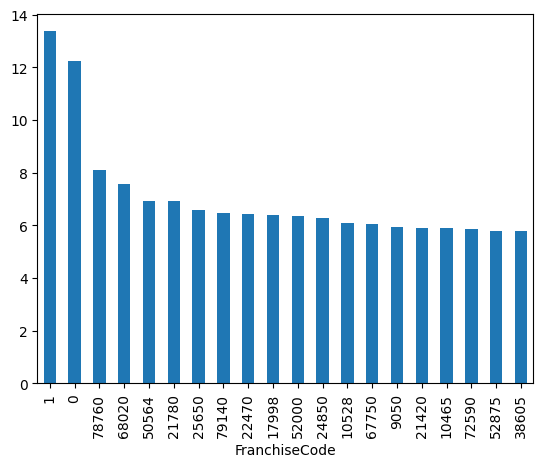

In [30]:
test=df['FranchiseCode'].value_counts()
test_log=np.log(test)
test_log.nlargest(20).plot(kind='bar')

## Bivariate analysis

### Chi2 test